In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Classes_Container


In [2]:
# Load Wine model

Wine_Data = BB_Model('Wine', 'classification')

Wine_Data.df().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
Wine_Data.MPL()

0.5193877551020408


MLPClassifier(random_state=RandomState(MT19937) at 0x1D40A7E1C40)

In [4]:
Wine_Data.Random_Forest()

0.6744897959183673


RandomForestClassifier(random_state=RandomState(MT19937) at 0x1D40A7E1C40)

In [5]:
print(Wine_Data.get_features())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [6]:
# LIME Explanation for Training Data
from lime import lime_tabular

X_train, X_test, y_train, y_test = Wine_Data.get_TT_data()

LIME_Exp = lime_tabular.LimeTabularExplainer(training_data=X_train,
                                             mode=Wine_Data.get_mode(),
                                             #training_labels=None,
                                             feature_names=Wine_Data.get_features(),
                                             categorical_features=Wine_Data.get_catagorical(),
                                             #categorical_names=None,
                                             #kernel_width=None,
                                             #kernel=None,
                                             verbose=False,
                                             #class_names=None,
                                             #feature_selection='auto',
                                             discretize_continuous=False,
                                             #discretizer='quartile',
                                             sample_around_instance=True)
                                             #random_state=None,
                                             #training_data_stats=None)
        


In [7]:
# Generate explantion data for Random Forest

Wine_Stats = Feature_Statistics(feature_names = Wine_Data.get_features(), mode='classification', classes=Wine_Data.get_classes())

for test_instance in range(X_test.shape[0]):

    data_row  = X_test[test_instance,:]
    
    explain_inst = LIME_Exp.explain_instance(data_row=data_row,
                                             predict_fn=Wine_Data.get_Random_Forest().predict_proba,
                                             #labels=None,
                                             #top_labels=None,
                                             #num_features=10,
                                             num_samples=100,
                                             #distance_metric='euclidean',
                                             #model_regressor=None,
                                             sampling_method='gaussian')
    
    y_predict = Wine_Data.get_Random_Forest().predict_proba(data_row.reshape(1, -1))

    print('INSTANCE: ', test_instance)
    
    Wine_Stats.Add_LIME_Sample(sample     = explain_inst.as_list(),
                                   outcome    = y_test[test_instance],
                                   prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56
INSTANCE:  57
INSTANCE:  58
INSTANCE:  59
INSTANCE:  60
INSTANCE:  61
INSTANCE:  62
INSTANCE:  63
INSTANCE:  64
INSTANCE:  65
INSTANCE:  66
INSTANCE:  67
INSTANCE:  68
INSTANCE:  69
INSTANCE:  70
INSTANCE:  71
IN

In [8]:
Wine_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

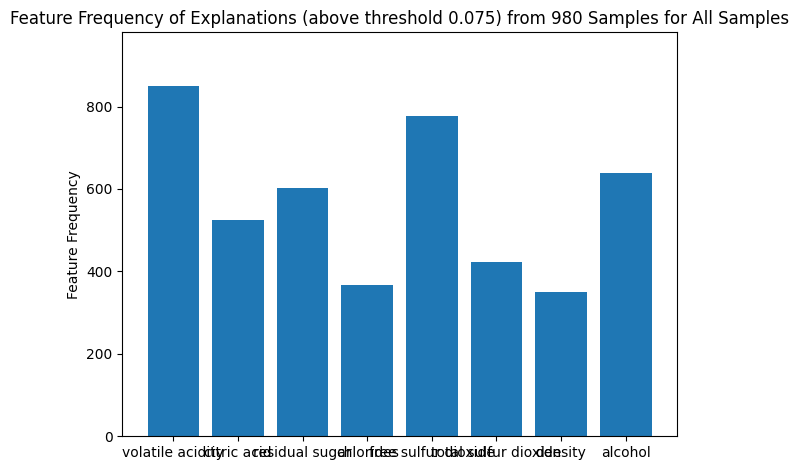

In [9]:
Wine_Stats.Frequency_Plot()

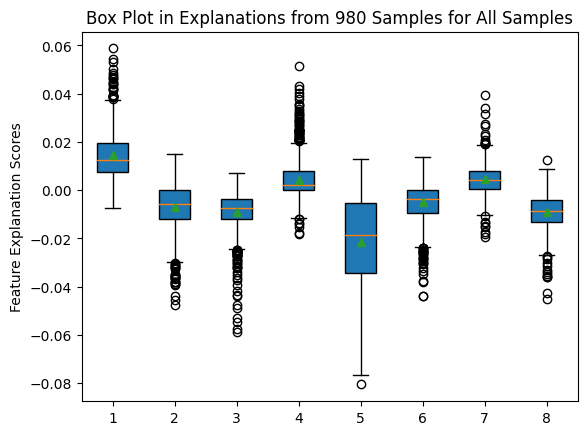

1 -      volatile acidity
2 -      citric acid
3 -      residual sugar
4 -      chlorides
5 -      free sulfur dioxide
6 -      total sulfur dioxide
7 -      density
8 -      alcohol


In [10]:
Wine_Stats.Box_Plot()

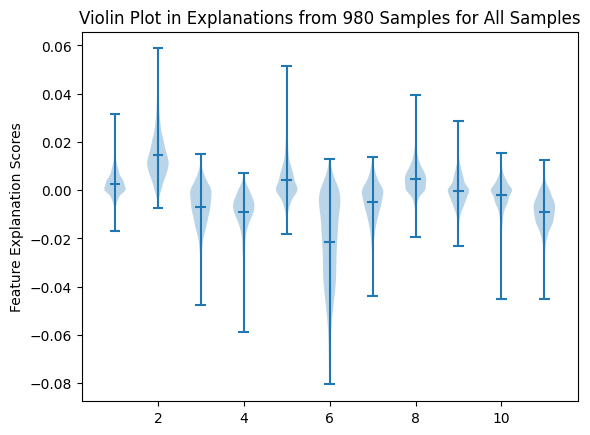

1 -      fixed acidity
2 -      volatile acidity
3 -      citric acid
4 -      residual sugar
5 -      chlorides
6 -      free sulfur dioxide
7 -      total sulfur dioxide
8 -      density
9 -      pH
10 -     sulphates
11 -     alcohol


In [11]:
Wine_Stats.Violin_Plot(top_features=False)

In [12]:
Wine_Container = Classes_Container(Wine_Stats)

Wine_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.1)


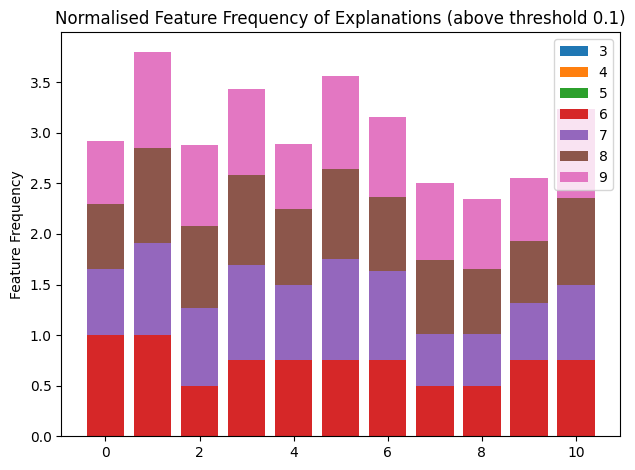

0 -      fixed acidity
1 -      volatile acidity
2 -      citric acid
3 -      residual sugar
4 -      chlorides
5 -      free sulfur dioxide
6 -      total sulfur dioxide
7 -      density
8 -      pH
9 -     sulphates
10 -     alcohol


In [13]:
Wine_Container.Frequency_Plot()